<a href="https://colab.research.google.com/github/jbkim900/Jeongbeom-kim/blob/main/Seoul%EC%A7%80%EC%97%AD_%EA%B8%B0%EC%98%A8_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_2025_01_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
df = pd.read_csv('/content/seoul_weather.csv')

In [ ]:
df = pd.read_csv("/content/seoul_weather.csv")

In [ ]:
df = df[['datetime', 'tempmax', 'tempmin', 'temp']]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df.set_index('datetime', inplace=True)

In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-9-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.head())

            tempmax  tempmin  temp
datetime                          
2022-01-01      2.0    -10.2  -4.7
2022-01-02      2.6     -4.4  -1.1
2022-01-03      2.2     -7.7  -2.4
2022-01-04      1.0     -5.0  -1.9
2022-01-05      1.7     -7.7  -3.1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
from IPython import get_ipython
from IPython.display import display
# %%
import pandas as pd
import numpy as np # Add this line to import numpy
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# %%
import pandas as pd
df = pd.read_csv('/content/seoul_weather.csv')
# %%
df = pd.read_csv("/content/seoul_weather.csv")
# %%
df = df[['datetime', 'tempmax', 'tempmin', 'temp']]
# %%
df['datetime'] = pd.to_datetime(df['datetime'])
# %%
df.set_index('datetime', inplace=True)
# %%
df.fillna(method='ffill', inplace=True)
# %%
print(df.head())
# %%
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# %%
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, 2])  # 예측 목표: 평균 기온(temp)
    return np.array(X), np.array(y) # np is now defined and can be used

sequence_length = 30  # 30일 데이터를 기반으로 예측
X, y = create_sequences(scaled_data, sequence_length)


            tempmax  tempmin  temp
datetime                          
2022-01-01      2.0    -10.2  -4.7
2022-01-02      2.6     -4.4  -1.1
2022-01-03      2.2     -7.7  -2.4
2022-01-04      1.0     -5.0  -1.9
2022-01-05      1.7     -7.7  -3.1


<ipython-input-12-7964112b16da>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - loss: 0.1821 - val_loss: 0.0373
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0219 - val_loss: 0.0037
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0152 - val_loss: 0.0124
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0115 - val_loss: 0.0027
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0107 - val_loss: 0.0034
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0092 - val_loss: 0.0035
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0097 - val_loss: 0.0039
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0095 - val_loss: 0.0027
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0096 - val_loss: 0.0025
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0110 - val_loss: 0.0028
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0077 - val_loss: 0.0026
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.

In [ ]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [ ]:
y_test_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :2], y_test.reshape(-1, 1)], axis=1))[:, 2]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


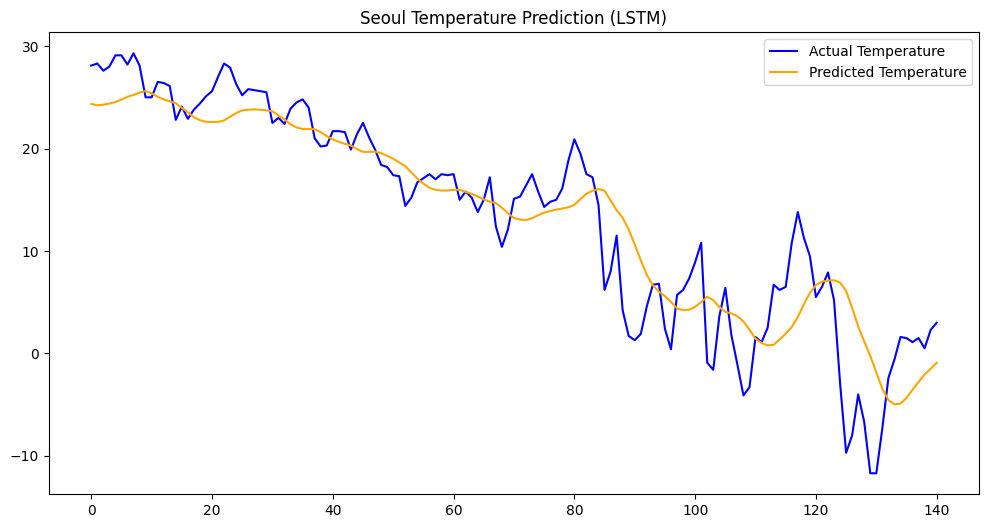

In [ ]:
y_pred = model.predict(X_test)

# Rescale the predicted values to the original scale
y_pred_rescaled = scaler.inverse_transform(np.concatenate([X_test[:, -1, :2], y_pred.reshape(-1, 1)], axis=1))[:, 2]

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label='Actual Temperature', color='blue')
plt.plot(y_pred_rescaled, label='Predicted Temperature', color='orange') # Now y_pred_rescaled is defined
plt.title('Seoul Temperature Prediction (LSTM)')
plt.legend()
plt.show()